# Setup notebook

In [1]:
#Setup dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
#Treat outliers
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
#Treat numerical values
from sklearn.preprocessing import LabelEncoder

#Option for displaying rows, columns in notebook
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Reading dataset

In [2]:
path = pd.ExcelFile('Dataset/Healthcare_dataset.xlsx')
df= pd.read_excel(path, 'Dataset')

# Exploring Dataset

In [3]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [4]:
df.shape

(3424, 69)

In [5]:
df.dtypes.value_counts()

object    67
int64      2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

 **Class Distribution**
 
 **Calculate percentage of Persistent  and Non-Persistent in the dataset**

In [7]:
#Get total number of Persistency and Non-Persistency in Persistency_Flag column
types= df['Persistency_Flag'].value_counts()
print(types)


Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64


In [8]:
#Calculate the percentage of Persistency and Non-Persistency
Flag= round(types[0]/df['Persistency_Flag'].count()*100,2)
Non_Flag=round(types[1]/df['Persistency_Flag'].count()*100,2)
#prin the result
print("Persistent : {} %".format(Flag))
print("Non-Persistent : {} %".format(Non_Flag))

Persistent : 62.35 %
Non-Persistent : 37.65 %


# Checking Missing Value/Null data

In [9]:
df.isnull().sum()

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}'.format(col,pct_missing))
    
#No missing data



Ptid - 0.0
Persistency_Flag - 0.0
Gender - 0.0
Race - 0.0
Ethnicity - 0.0
Region - 0.0
Age_Bucket - 0.0
Ntm_Speciality - 0.0
Ntm_Specialist_Flag - 0.0
Ntm_Speciality_Bucket - 0.0
Gluco_Record_Prior_Ntm - 0.0
Gluco_Record_During_Rx - 0.0
Dexa_Freq_During_Rx - 0.0
Dexa_During_Rx - 0.0
Frag_Frac_Prior_Ntm - 0.0
Frag_Frac_During_Rx - 0.0
Risk_Segment_Prior_Ntm - 0.0
Tscore_Bucket_Prior_Ntm - 0.0
Risk_Segment_During_Rx - 0.0
Tscore_Bucket_During_Rx - 0.0
Change_T_Score - 0.0
Change_Risk_Segment - 0.0
Adherent_Flag - 0.0
Idn_Indicator - 0.0
Injectable_Experience_During_Rx - 0.0
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms - 0.0
Comorb_Encounter_For_Immunization - 0.0
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx - 0.0
Comorb_Vitamin_D_Deficiency - 0.0
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified - 0.0
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx - 0.0
Comorb_Long_Term_Current_Drug_Therapy - 0.0
Comorb_Dorsalgia - 0.0
Comorb_Personal_H

Based on the quick checking, there is no missing data in the dataset! 

In [10]:
#Print the input data of each variable
for col in df: #print the unique of each column
    print("column_name:",col,"---unique:", df[col].unique())

column_name: Ptid ---unique: ['P1' 'P2' 'P3' ... 'P3422' 'P3423' 'P3424']
column_name: Persistency_Flag ---unique: ['Persistent' 'Non-Persistent']
column_name: Gender ---unique: ['Male' 'Female']
column_name: Race ---unique: ['Caucasian' 'Asian' 'Other/Unknown' 'African American']
column_name: Ethnicity ---unique: ['Not Hispanic' 'Hispanic' 'Unknown']
column_name: Region ---unique: ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
column_name: Age_Bucket ---unique: ['>75' '55-65' '65-75' '<55']
column_name: Ntm_Speciality ---unique: ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHALMOLOGY' 'OCCUPATIONAL MEDICINE'
 'TRANSPLANT 

Although there are no missing data in the dataset but there are many "Y" and "N" or  categorical variables instead of number, which could cause problem when we trainning model later. Therefore, we will use Label encoding for category variables. 

## Outlier Analysis

Because we only have two numerical columns so we will focus only in these two columns

In [11]:
df.corr(method="pearson", min_periods=1)

,Dexa_Freq_During_Rx,Count_Of_Risks
Dexa_Freq_During_Rx,1.000000,0.013964
Count_Of_Risks,0.013964,1.000000


### Identifying Outliers with Interquartile Range (IQR)

The difference between the 75th and 25th percentiles is being used to compute the interquartile range (IQR), which is a measure of statistical dispersion. IQR = Q3 Q1 is the formula for calculating it. 

For each of the variables in the dataset, the lines of code below calculate and report the interquartile range.

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Dexa_Freq_During_Rx    3.0
Count_Of_Risks         2.0
dtype: float64


The above output prints the IQR scores, which can be used to detect outliers. It suggests that both these variables have outliers in their data. Let's check different approaches before implementing solutions to deal with outliers in these variable.

### Identifying Outliers with Skewness and Kurtosis Value


In [13]:
#How much is the skewness
print("Dexa_Freq_During_Rx skewness: ",df["Dexa_Freq_During_Rx"].skew())
print("Dexa_Freq_During_Rx Kurtosis: ",df["Dexa_Freq_During_Rx"].kurt())


Dexa_Freq_During_Rx skewness:  6.8087302112992285
Dexa_Freq_During_Rx Kurtosis:  74.75837754795428


In [14]:
#How much is the skewness
print("Count of risks skewness: ",df["Count_Of_Risks"].skew())
print("Count of risks Kurtosis: ",df["Count_Of_Risks"].kurt())


Count of risks skewness:  0.8797905232898707
Count of risks Kurtosis:  0.9004859968892842


For "Dexa Freq During Rx," the value of skewness and Kurtosis suggest that this variable has a lot of outliers, which takes into account a lot of outliers. Furthermore, the data for "Count of Risk" has a moderate skewness and is moderately kurtosis(Platykurtic), indicating that there are few outliers.

Let's visualize these variable to vertify the outliers in these variable. 

### Identifying Outliers with Boxplot


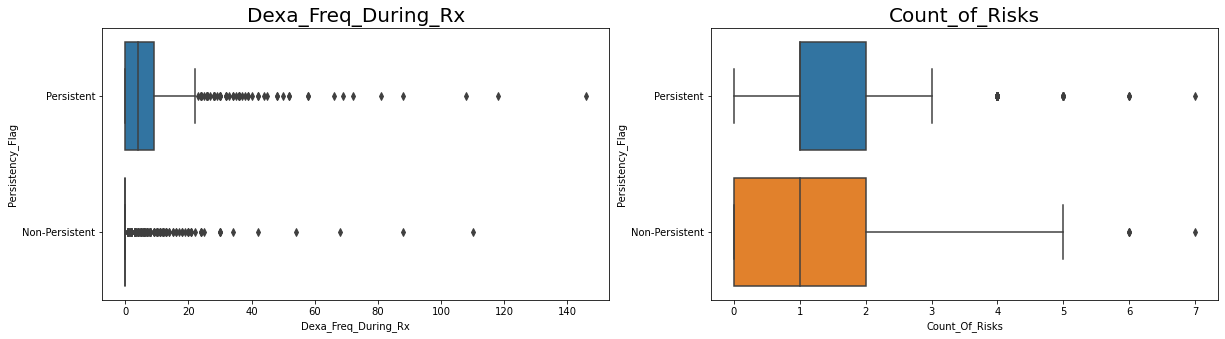

In [15]:
#Outliers
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x= df['Dexa_Freq_During_Rx'], y = df['Persistency_Flag'])
plt.title('Dexa_Freq_During_Rx', fontsize=20)
plt.subplot(122)
sns.boxplot(x= df['Count_Of_Risks'],  y = df['Persistency_Flag'])
plt.title('Count_of_Risks', fontsize=20)
plt.show()

# **Data Wrangling , Transformation and Standardization**

As we can see on these graphs, it is clearly to conclude that both Dexa_Freq_During_Rx and Count_of_Risks variables have outliers. Therefore, we will implement solutions to deal with this issue



## Assign Value to Y and N, and Persistent and Non-Persistent
**Label Categorical Value**

 We  need to pre-process our categorical data from words to number to make it easier for the computer to understands. To do this we will use LabelEncoder() provided by sklearn. Basically it will transform a categorical column from this (example to describe this approach):

| Gender | Race |
|----------|---------|
| Male   | Asian     |
| Female | Other/Unknown|
| Male   | Caucasian |

...into something like this...
For example, Male will be 1 and Female will be 0

| Gender | Race |
|--------|------|
| 1      | 1    | 
| 0      | 3    |
| 1      | 2    | 

In this code cell we will also encode our label column by replacing 'yes' and 'no' with 1 and 0 respectively. We can do this by applying simple lambda/in-line function on the column.

In [16]:
#Before transforming the data, we need to encode the categorical variables
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [17]:

#For categorical variable have more than two different categories
two_cat = ['Persistency_Flag','Gender','Ntm_Specialist_Flag','Risk_Segment_Prior_Ntm','Adherent_Flag', 'Tscore_Bucket_Prior_Ntm','Gluco_Record_Prior_Ntm','Gluco_Record_During_Rx','Dexa_During_Rx','Frag_Frac_During_Rx','Adherent_Flag','Idn_Indicator','Injectable_Experience_During_Rx','Frag_Frac_Prior_Ntm']

# Assign Label Encoder as labelne
labelne = LabelEncoder()
for col in two_cat:
    df[col] = labelne.fit_transform(df[col])

#Transform categorical variables with multiple categories using same technique
mul_cat = ['Age_Bucket','Ntm_Speciality','Ntm_Speciality_Bucket','Race','Ethnicity','Region']

for col in mul_cat:
    df[col] = df[col].astype('category')
    df[col] = labelne.fit_transform(df[col])

df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,1,1,2,1,4,3,5,0,1,0,0,0,0,0,0,1,1,VLR_LR,<=-2.5,No change,Unknown,0,0,1,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,0,1,1,1,4,0,5,0,1,0,0,0,0,0,0,1,1,Unknown,Unknown,Unknown,Unknown,0,0,1,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,0,0,3,0,0,1,5,0,1,0,0,0,0,0,0,0,0,HR_VHR,<=-2.5,No change,No change,0,0,1,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,0,0,2,1,0,3,5,0,1,0,1,0,0,0,0,0,1,HR_VHR,<=-2.5,No change,No change,0,0,1,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,0,0,2,1,0,3,5,0,1,1,1,0,0,0,0,0,0,Unknown,Unknown,Unknown,Unknown,0,0,1,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [18]:
print(df.dtypes)


Ptid                                                                  object
Persistency_Flag                                                       int32
Gender                                                                 int32
Race                                                                   int32
Ethnicity                                                              int32
Region                                                                 int32
Age_Bucket                                                             int32
Ntm_Speciality                                                         int32
Ntm_Specialist_Flag                                                    int32
Ntm_Speciality_Bucket                                                  int32
Gluco_Record_Prior_Ntm                                                 int32
Gluco_Record_During_Rx                                                 int32
Dexa_Freq_During_Rx                                                    int64

## Data Transformation to resolve outliers 

**IQR solution for outliers**

My first approach to deal with the skewness and outliers for these variables is using IQR Score. To remove outliers, this approach uses the IQR values calculated before. Anything outside of the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is considered an outlier and should be eliminated.

In this project, for Dexa_Freq_During_Rx and Count_of_Risks, I will remove any data outside of the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) or two whiskers. 

In [19]:
#remove outliers from count_of_risks column 
col1 = df['Count_Of_Risks']
Q3 = np.quantile(col1, 0.75)
Q1 = np.quantile(col2, 0.25)
IQR = Q3 - Q1
print("IQR for Count_of_risks is:", IQR)
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
#upper mask
upper_mask = np.where(df['Count_Of_Risks'] >= (upper_range))
# Lower mask
lower_mask= np.where(df['Count_Of_Risks']<= (lower_range)) 

#
outlier_free_list = [x for x in df['Count_Of_Risks'] if ( (x > lower_range) & (x < upper_range))]

filtered_data = df.loc[df['Count_Of_Risks'].isin(outlier_free_list)]
#Use * to remove brackets
print("New Shape is:", *np.shape(filtered_data['Count_Of_Risks']),"Old Shape is:" , *np.shape(df['Count_Of_Risks']))


NameError: name 'col2' is not defined

In [ ]:
#remove outliers from count_of_risks column 
col2 = df['Dexa_Freq_During_Rx']
Q3 = np.quantile(col2, 0.75)
Q1 = np.quantile(col2, 0.25)
IQR = Q3 - Q1
print("IQR for Dexa_Freq_During_Rx is:", IQR)
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
#upper mask
upper_mask = np.where(df['Dexa_Freq_During_Rx'] >= (upper_range))
# Lower mask
lower_mask= np.where(df['Dexa_Freq_During_Rx']<= (lower_range)) 

#
outlier_free_list = [x for x in df['Dexa_Freq_During_Rx'] if ( (x > lower_range) & (x < upper_range))]

filtered_data = df.loc[df['Dexa_Freq_During_Rx'].isin(outlier_free_list)]
print("New Shape is:", *np.shape(filtered_data['Dexa_Freq_During_Rx']),"Old Shape is:" , *np.shape(df['Dexa_Freq_During_Rx']))


IQR for Dexa_Freq_During_Rx is: 3.0
New Shape is: 2964 Old Shape is: 3424


## EDA Analysis 

EDA is really important to understand the correlation between  persistency_flag columns with other variables in the dataset

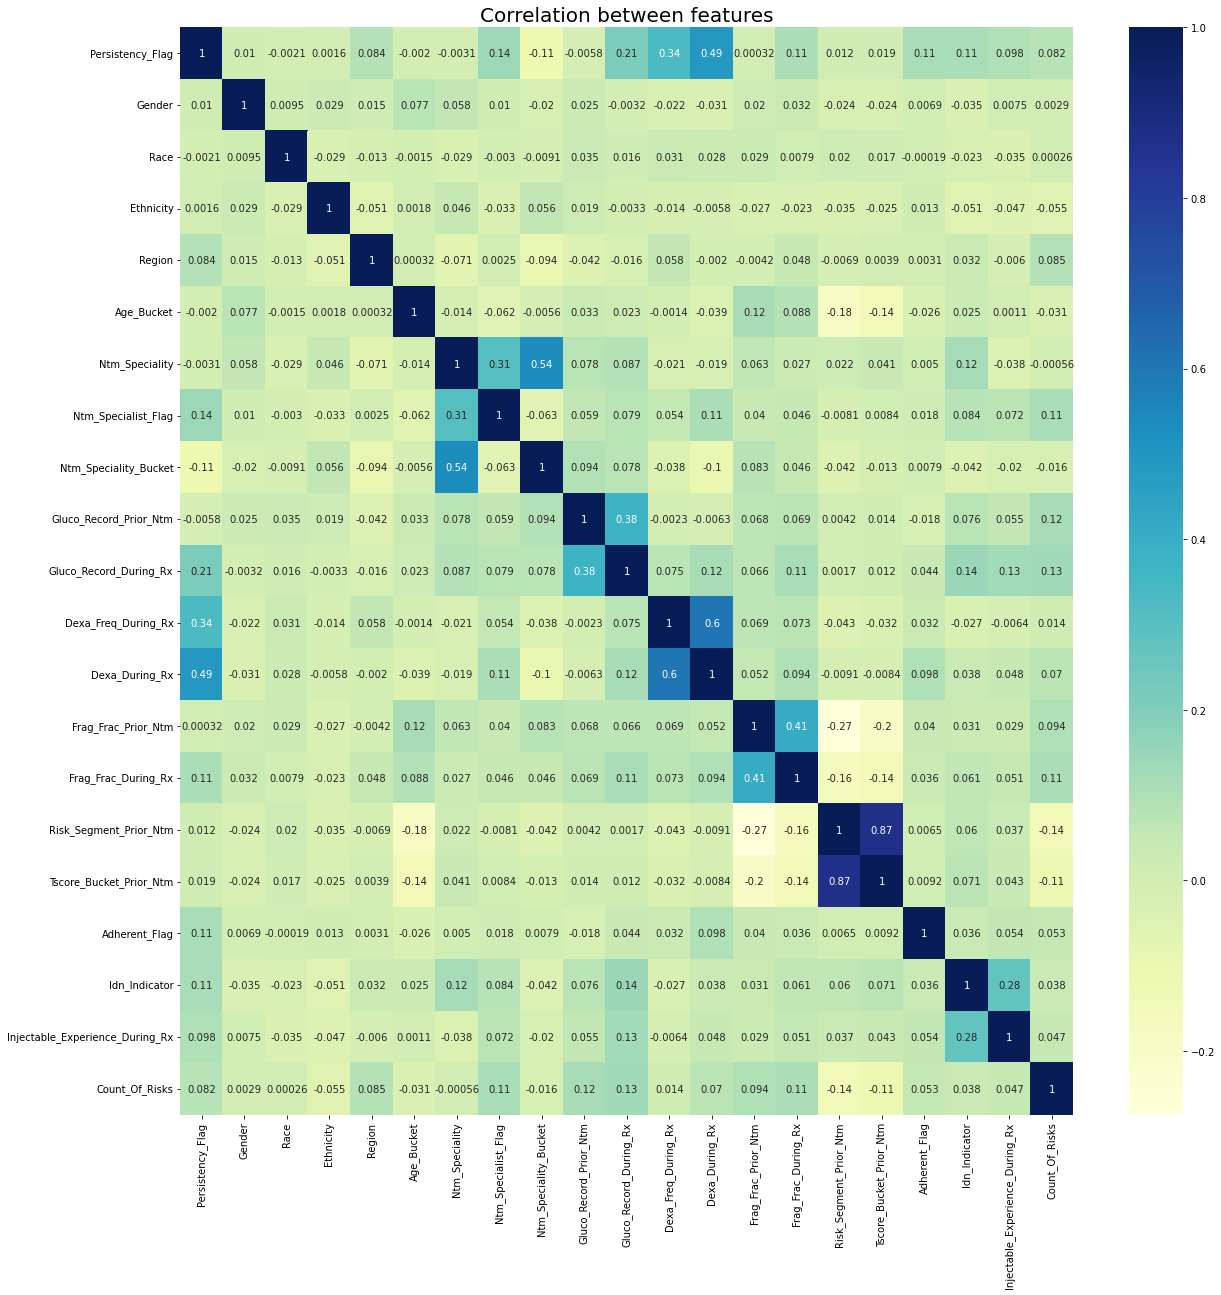

In [ ]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(data = df.corr(),cmap='YlGnBu',annot=True)
plt.title('Correlation between features',color = 'black',fontsize = 20)
#plt.savefig('corr_overall.png', dpi=300)
plt.show()

In [ ]:
#Sort variable from highest to lowest correlation 
df[df.columns[1:]].corr()['Persistency_Flag'][:].sort_values(ascending=False)


Persistency_Flag                   1.000000
Dexa_During_Rx                     0.491823
Dexa_Freq_During_Rx                0.335235
Gluco_Record_During_Rx             0.212704
Ntm_Specialist_Flag                0.139387
Adherent_Flag                      0.112488
Idn_Indicator                      0.111440
Frag_Frac_During_Rx                0.106935
Injectable_Experience_During_Rx    0.098360
Region                             0.084415
Count_Of_Risks                     0.082210
Tscore_Bucket_Prior_Ntm            0.018903
Risk_Segment_Prior_Ntm             0.012223
Gender                             0.010343
Ethnicity                          0.001630
Frag_Frac_Prior_Ntm                0.000318
Age_Bucket                        -0.001976
Race                              -0.002052
Ntm_Speciality                    -0.003143
Gluco_Record_Prior_Ntm            -0.005758
Ntm_Speciality_Bucket             -0.112617
Name: Persistency_Flag, dtype: float64

The above correlation measures pointed out that the features with negative scores are not powerful in predicting target variable. So we have decided to take the features which are greater the value of 0.025.

Checking Gender, Region and Ethnicity based on each persistency flag

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

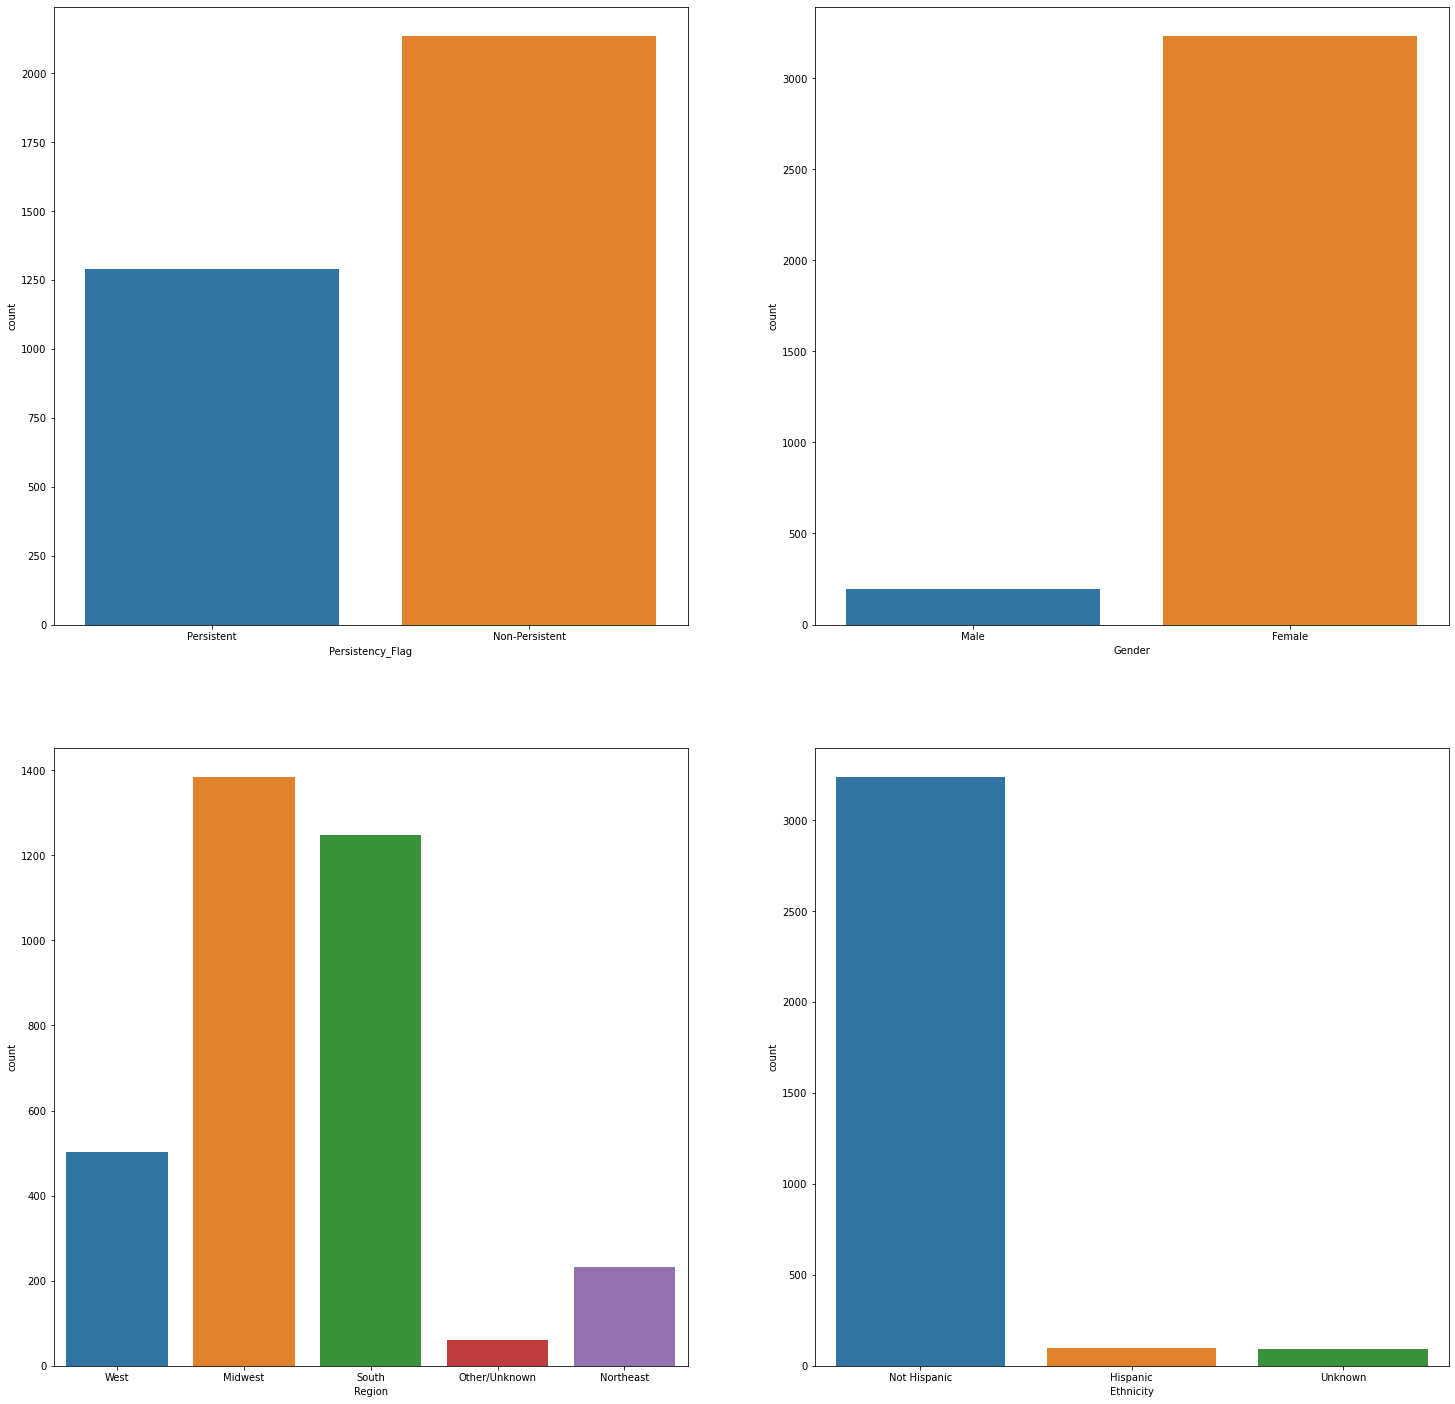

In [ ]:
Categorical1 = ['Persistency_Flag','Gender', 'Region','Ethnicity' ]

fig, ax = plt.subplots(2, 2, figsize=(25,25))
for variable, subplot in zip(Categorical1, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(360)

Checking Age categories for each type of Persistent Flag

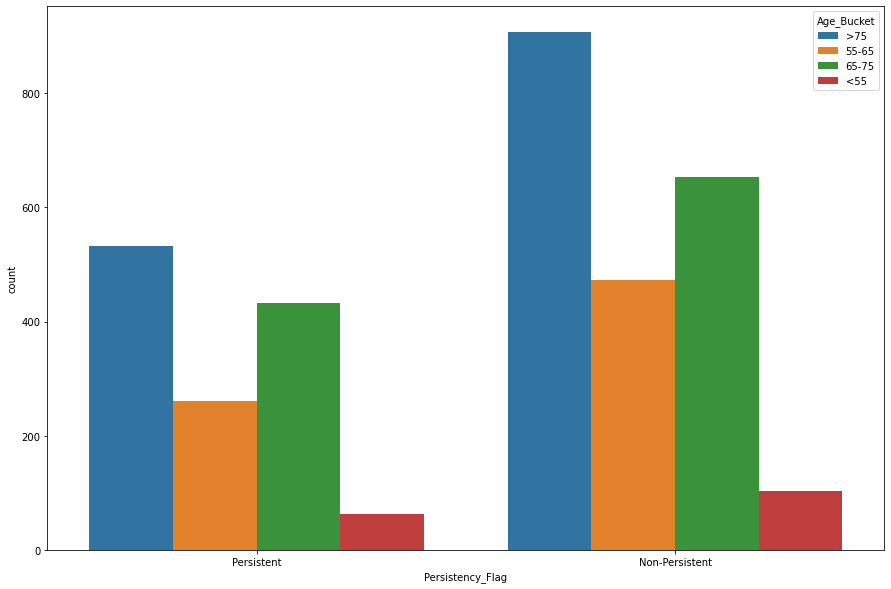

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="Persistency_Flag", hue="Age_Bucket", data=df)

# Model Development
## Linear Model
**Logistic Regression Model**

In [55]:
#Install packages for model deplyment
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

**Splitting of data into Training and Testing dataset for ML Models**


In [61]:
#Split the data into training and testing sets
X = df.drop(columns=['Persistency_Flag'], axis=1)
Y = df['Persistency_Flag']
X = pd.get_dummies(X)
X.columns=[x.lower() for x in X.columns]
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [62]:
df_train = X_train.copy()
df_train['persistency_flag'] = Y_train
df_train.head()

gender  race  ethnicity  region  age_bucket  ntm_speciality  \
3120       0     2          1       0           0              30   
3067       0     2          1       0           1              30   
1094       0     0          1       3           1               3   
2052       0     2          2       3           0               5   
1305       0     2          1       3           3               5   

      ntm_specialist_flag  ntm_speciality_bucket  gluco_record_prior_ntm  \
3120                    1                      2                       0   
3067                    1                      2                       0   
1094                    1                      0                       0   
2052                    0                      1                       0   
1305                    0                      1                       0   

      gluco_record_during_rx  dexa_freq_during_rx  dexa_during_rx  \
3120                       0                    0               0   
3067                       0                    0               0   
1094                       0                    6               1   
2052                       0                    0               0   
1305                       0                    0               0   

      frag_frac_prior_ntm  frag_frac_during_rx  risk_segment_prior_ntm  \
3120                    0                    0                       1   
3067                    0                    0                       1   
1094                    0                    0                       1   
2052                    0                    0                       1   
1305                    0                    0                       1   

      tscore_bucket_prior_ntm  adherent_flag  idn_indicator  \
3120                        1              0              1   
3067                        1              0              1   
1094                        1              0              1   
2052                        1              0              0   
1305                        1              0              1   

      injectable_experience_during_rx  count_of_risks  ptid_p1  ptid_p10  \
3120                                1               2        0         0   
3067                                1               1        0         0   
1094                                1               1        0         0   
2052                                1               1        0         0   
1305                                1               0        0         0   

      ptid_p100  ptid_p1000  ptid_p1001  ptid_p1002  ptid_p1003  ptid_p1004  \
3120          0           0           0           0           0           0   
3067          0           0           0           0           0           0   
1094          0           0           0           0           0           0   
2052          0           0           0           0           0           0   
1305          0           0           0           0           0           0   

      ptid_p1005  ptid_p1006  ptid_p1007  ptid_p1008  ptid_p1009  ptid_p101  \
3120           0           0           0           0           0          0   
3067           0           0           0           0           0          0   
1094           0           0           0           0           0          0   
2052           0           0           0           0           0          0   
1305           0           0           0           0           0          0   

      ptid_p1010  ptid_p1011  ptid_p1012  ptid_p1013  ptid_p1014  ptid_p1015  \
3120           0           0           0           0           0           0   
3067           0           0           0           0           0           0   
1094           0           0           0           0           0           0   
2052           0           0           0           0           0           0   
1305           0           0           0           0           0           0   

      p

In [63]:
target_names=['Non-Persistent', 'Persistent']

#Use to estimate the performance of the model based on accuracy, precision, recall, f1 score, AUC ROCCURVE, CM
def evaluation_metrics(Y_test, Y_pre, target_names):
    #scores
    print("Accuracy :",accuracy_score(Y_test,Y_pre))
    print("Precision :",precision_score(Y_test,Y_pre))
    print("Recall :",recall_score(Y_test,Y_pre))
    print("F1 Score :",f1_score(Y_test,Y_pre))

    print(classification_report(Y_test, Y_pre, target_names=target_names))

    #AUC
    fpr, tpr, _ = roc_curve(Y_test,Y_pre)
    auc = roc_auc_score(Y_test,Y_pre)
    print("AUC :", auc)

    #ROC
    plt.plot(fpr,tpr,label="uc={:.3f})".format(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc=4)
    plt.show()

    #CM matrix
    matrix = confusion_matrix(Y_test, Y_pre)
    cm = pd.DataFrame(matrix, index=target_names, columns=target_names)

    sns.heatmap(cm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
    plt.title("Confusion Matrix"), plt.tight_layout()
    plt.ylabel("True Class"), plt.xlabel("Predicted Class")
    plt.show()






In [64]:
def logistic(X_train,X_test,Y_train,Y_test):
    model=LogisticRegression()
    model.fit(X_train,Y_train)
    Y_pre=model.predict(X_test)
    evaluation_metrics(Y_test, Y_pre, target_names)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy : 0.8093385214007782
Precision : 0.7736389684813754
Recall : 0.6976744186046512
F1 Score : 0.733695652173913
                precision    recall  f1-score   support

Non-Persistent       0.83      0.88      0.85       641
    Persistent       0.77      0.70      0.73       387

      accuracy                           0.81      1028
     macro avg       0.80      0.79      0.79      1028
  weighted avg       0.81      0.81      0.81      1028

AUC : 0.7872147444037296


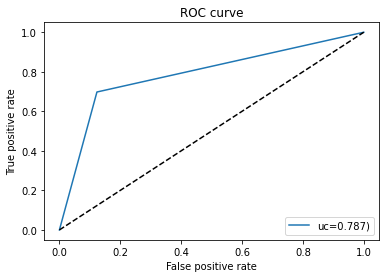

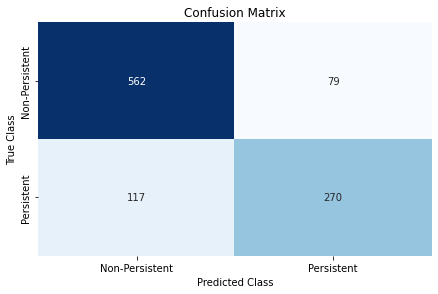

In [65]:
logistic(X_train,X_test,Y_train,Y_test)
